<a href="https://colab.research.google.com/github/ashishkumargoyal/Arsh-bot/blob/main/Ashish_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
data = pd.read_csv(url)

In [34]:
# Display the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


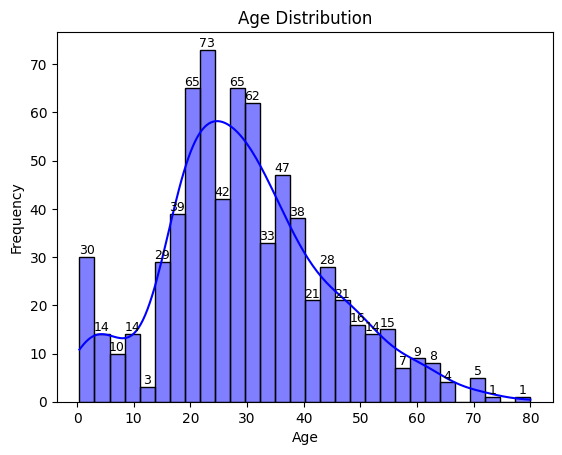

In [6]:
### Q1. What is the distribution of passenger ages on the Titanic?
# Plotting age distribution
sns.histplot(data['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
ax = plt.gca()  # Get the current axis
for patch in ax.patches:  # Loop through each bar (patch) in the histogram
    height = patch.get_height()  # Get the height of the bar
    if height > 0:  # Add label only for non-zero heights
        plt.text(
            patch.get_x() + patch.get_width() / 2,  # X position (center of the bar)
            height,  # Y position (height of the bar)
            int(height),  # Convert height to integer for display
            ha='center',  # Horizontal alignment
            va='bottom',  # Vertical alignment
            fontsize=9,  # Font size
            color='black'  # Font color
        )
plt.show()

In [7]:
### Inference:
# - Most passengers were aged between 20 and 40.

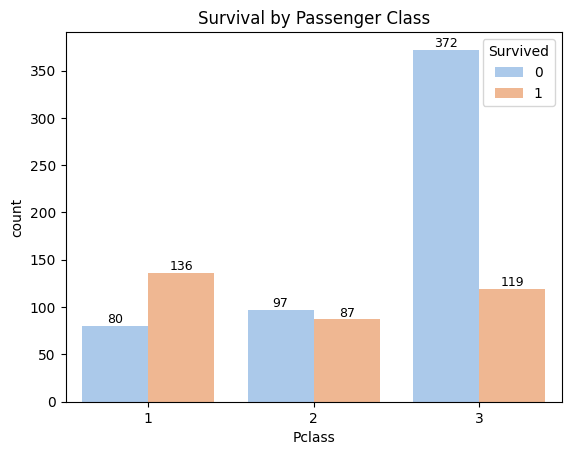

Survival Rate by Passenger Class:
 Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


In [8]:
### Q2. How does the survival rate vary based on passenger class (Pclass)?
# plotting survival rate by passenger class
sns.countplot(x='Pclass', hue='Survived', data=data, palette='pastel')
plt.title('Survival by Passenger Class')
ax = plt.gca()  # Get current axis
for container in ax.containers:  # Loop through the containers (bars for each hue)
    for bar in container:
        height = bar.get_height()  # Get the height of the bar
        if height > 0:  # Add labels only for non-zero bars
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
                height,  # Y position (height of the bar)
                int(height),  # Text label (integer count)
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9,  # Font size
                color='black'  # Text color
            )
plt.show()

# Calculate survival rate by class
survival_class = data.groupby('Pclass')['Survived'].mean() * 100
print("Survival Rate by Passenger Class:\n", survival_class)

In [ ]:
## Inference:
# - Passengers in 1st class had the highest survival rate, while those in 3rd class had the lowest.

<ipython-input-11-d5b2bffd51c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass', y='Fare', data=data, palette='muted')


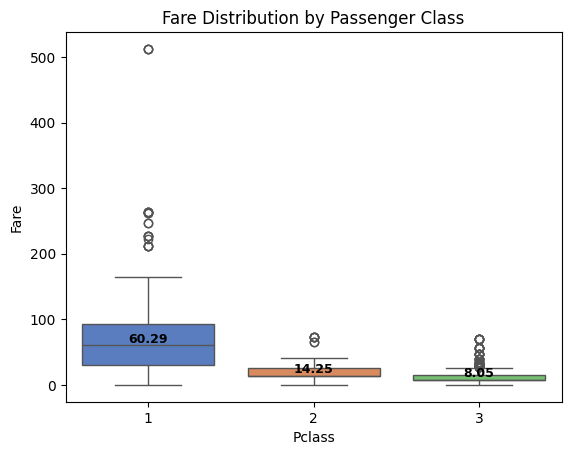

In [11]:
### Q3. Is there a relationship between the fare paid and the likelihood of survival?
# Plotting fare distribution by class
sns.boxplot(x='Pclass', y='Fare', data=data, palette='muted')
plt.title('Fare Distribution by Passenger Class')
ax = plt.gca()  # Get current axis
medians = data.groupby('Pclass')['Fare'].median()
for i, median in enumerate(medians):
    ax.text(
        i,  # X position (category index)
        median,  # Y position (median value)
        f'{median:.2f}',  # Text label (formatted median value)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=9,  # Font size
        color='black',  # Text color
        fontweight='bold'  # Font weight
    )

plt.show()

In [ ]:
## Inference:
# - Passengers in 1st class paid significantly higher fares compared to other classes.

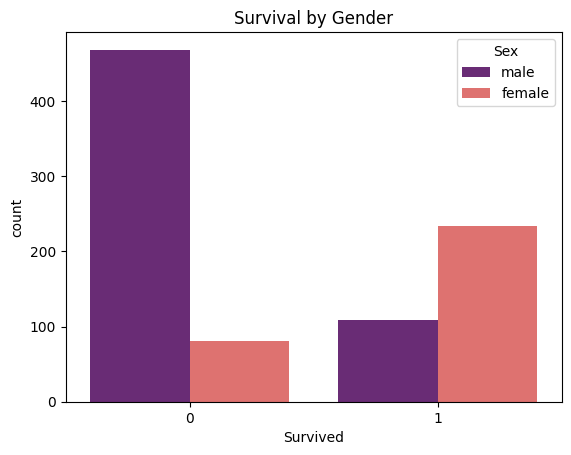

Survival Rate by Gender:
 Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [28]:
### Q4. How does the survival rate differ between male and female passengers?
# Plotting survival by gender
sns.countplot(x='Survived', hue='Sex', data=data, palette='magma')
plt.title('Survival by Gender')
plt.show()

# Calculate survival rate by gender
survival_gender = data.groupby('Sex')['Survived'].mean() * 100
print("Survival Rate by Gender:\n", survival_gender)

In [ ]:
### Inference:
# - Females had a significantly higher survival rate compared to males.

Object `survival` not found.


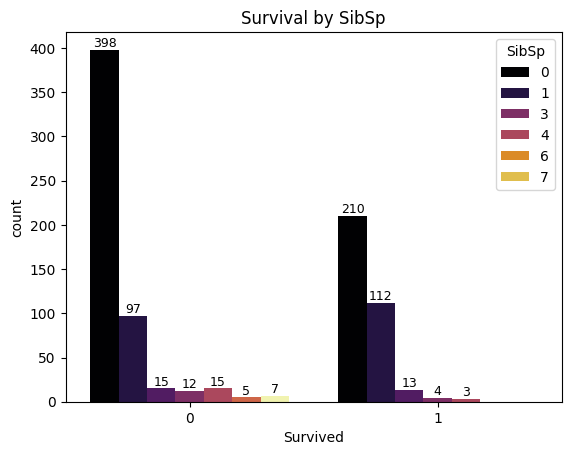

Survival Rate by SibSp:
 SibSp
0    34.539474
1    53.588517
2    46.428571
3    25.000000
4    16.666667
5     0.000000
8     0.000000
Name: Survived, dtype: float64


In [43]:
###Q5. What impact does the number of siblings/spouses (SibSp) or parents/children
(Parch) aboard have on survival?
# Plotting survival by SibSp
sns.countplot(x='Survived', hue='SibSp', data=data, palette='inferno')
plt.title('Survival by SibSp')
ax = plt.gca()  # Get current axis
for container in ax.containers:  # Loop through containers (bars for each hue)
    for bar in container:
        height = bar.get_height()  # Get the height of the bar
        if height > 0:  # Add labels only for non-zero heights
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # X position (center of the bar)
                height,  # Y position (height of the bar)
                int(height),  # Label text (count value)
                ha='center',  # Horizontal alignment
                va='bottom',  # Vertical alignment
                fontsize=9,  # Font size
                color='black'  # Text color
            )
plt.show()

# Calculate survival rate by SibSp
survival_SibSp = data.groupby('SibSp')['Survived'].mean() * 100
print("Survival Rate by SibSp:\n", survival_SibSp)



In [ ]:
### Inference:
# - Ist sibling/spouse had a significantly higher survival rate compared to others

Object `ports` not found.


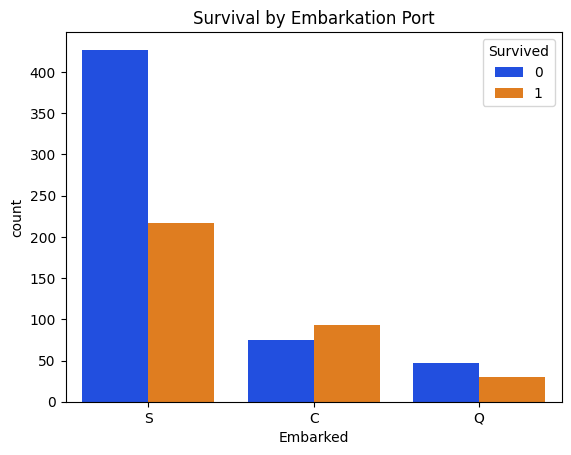

Survival Rate by Embarkation Port:
 Embarked
C    55.357143
Q    38.961039
S    33.695652
Name: Survived, dtype: float64


In [44]:
###Q6. Are there any significant differences in survival rates among passengers embarked
from different ports?
# Plotting survival by embarkation port
sns.countplot(x='Embarked', hue='Survived', data=data, palette='bright')
plt.title('Survival by Embarkation Port')
plt.show()
# Calculate survival rate by embarkation port
survival_embarked = data.groupby('Embarked')['Survived'].mean() * 100
print("Survival Rate by Embarkation Port:\n", survival_embarked)

In [ ]:
### Inference:
# - Passengers embarking from port 'C' had the highest survival rate.